<a href="https://colab.research.google.com/github/leakedog/collab/blob/main/2024-fall/seminars/sem01-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение 1, ПМИ ВШЭ

## Семинар 1. Разновидности данных и типы задач машинного обучения

На лекции мы обсуждали, что наиболее распространенными задачами машинного обучения являются классификация и регрессия. Но жизнь, как водится, богаче книги, и для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере МО.

In [4]:
!pip install torchaudio >> /dev/null

ERROR: Operation cancelled by user


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, посколько задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

**Внимание!** Образец хорошего оформления графика.

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

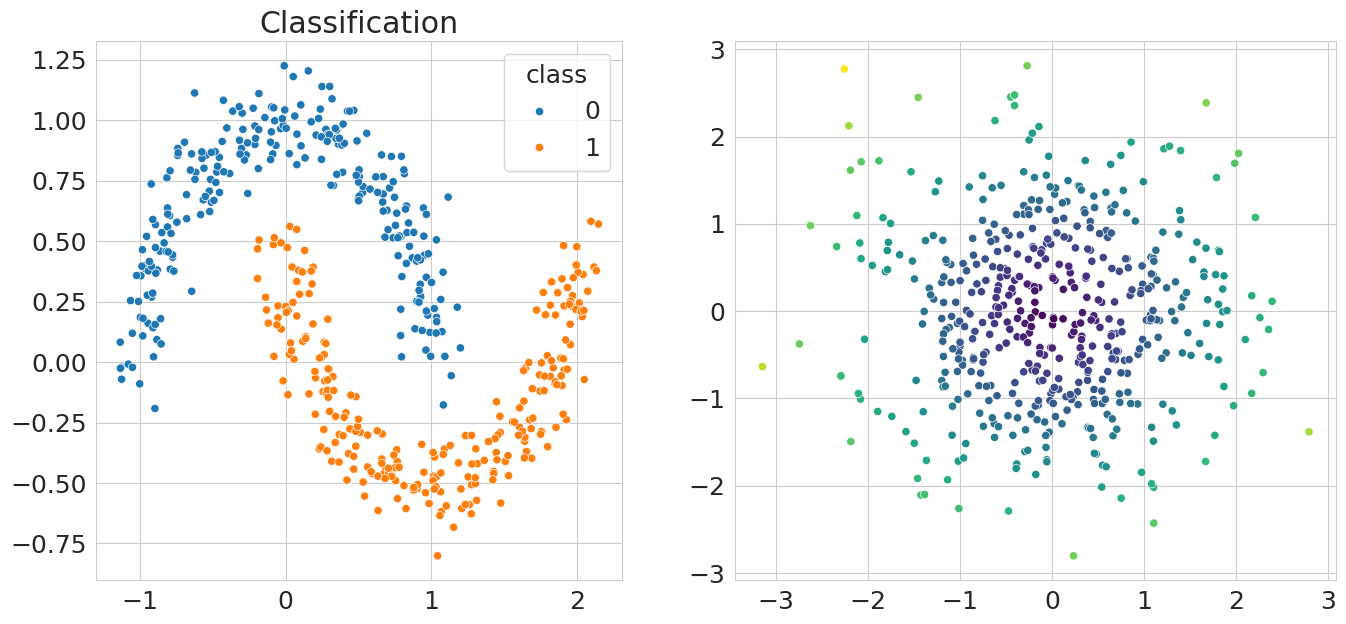

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

Примеры кластеризации на синтетических данных: https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями.
- Это один из самых распространненых типов данных, и в курсе МО-1 90% времени мы будем работать с таблицами
- Обычно признаки делятся на вещественные и категориальные.

Boston dataset: http://lib.stat.cmu.edu/datasets/boston

In [20]:
import pandas as pd
import numpy as np

# Load Boston housing data from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


# Match original structure
X = {
    'data': df.drop('medv', axis=1).values,
    'target': df['medv'].values,
    'feature_names': df.drop('medv', axis=1).columns
}

# Now your original logic works
X = pd.DataFrame(
    data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
    columns=list(X['feature_names']) + ['target']
)

X

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     ptratio       b  lstat  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB.

In [25]:
!wget -O image.jpg https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg

--2025-07-19 16:27:55--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212652 (208K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 207.67K  1.15MB/s    in 0.2s    

2025-07-19 16:27:56 (1.15 MB/s) - ‘image.jpg’ saved [212652/212652]



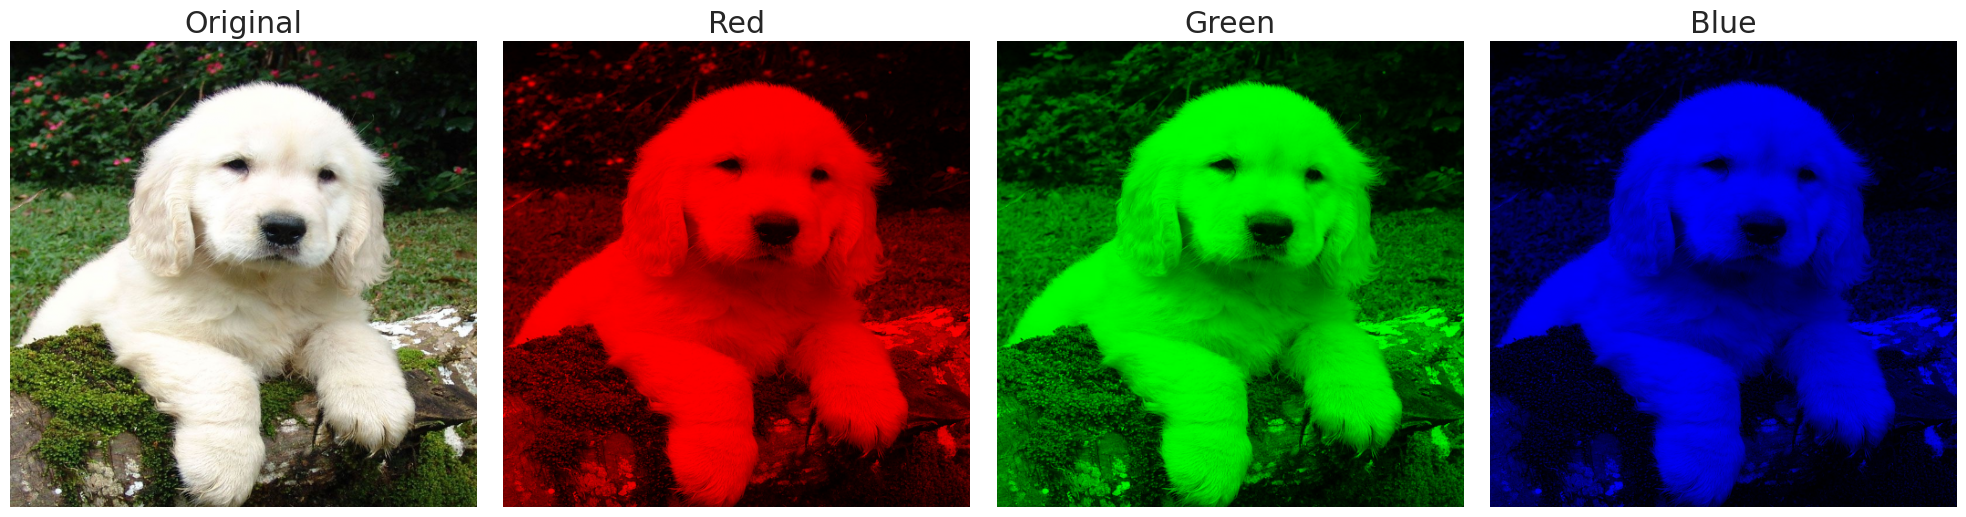

In [26]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Иногда используют и другие цветовые пространства, например, Lab (канал светлоты и два цветовых канала).

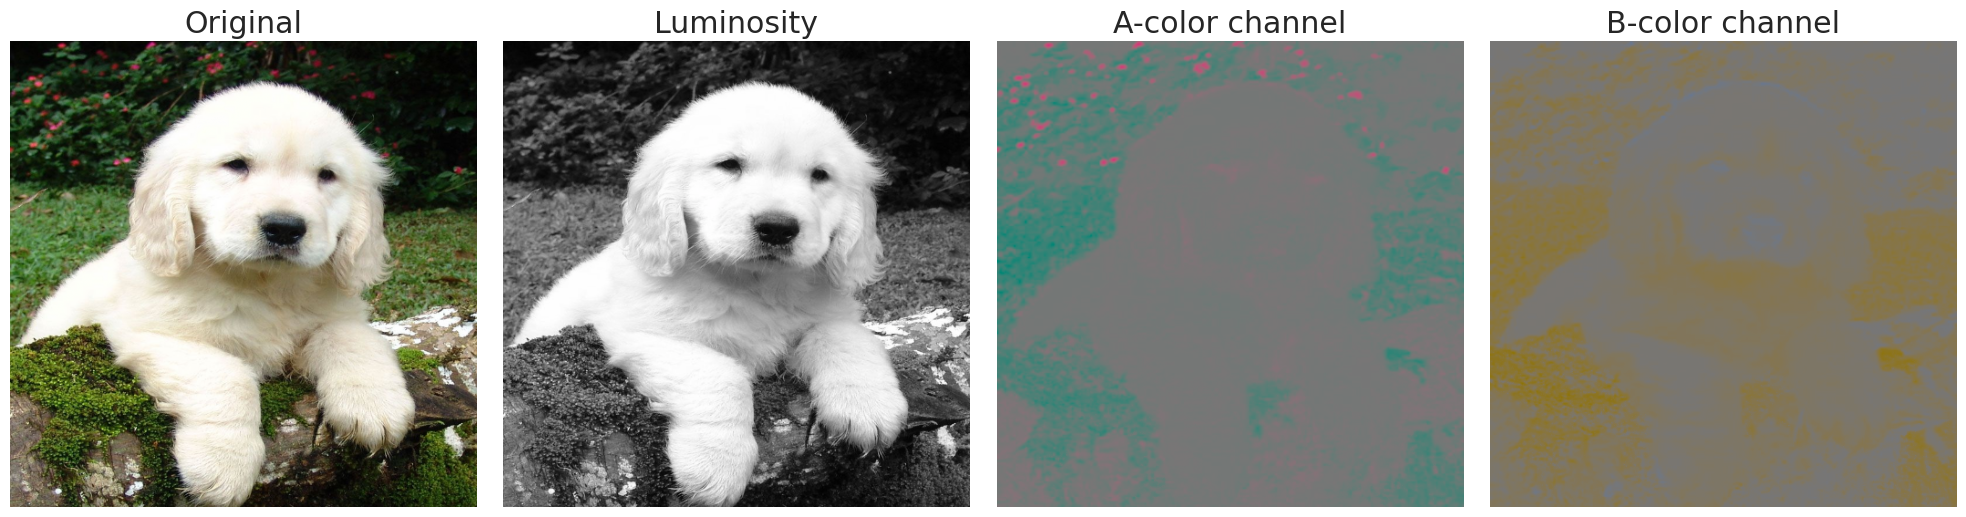

In [27]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


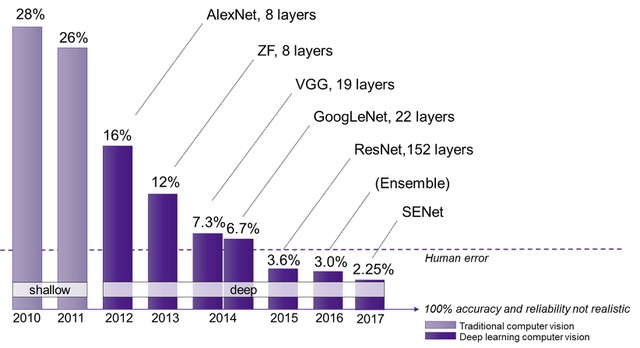

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


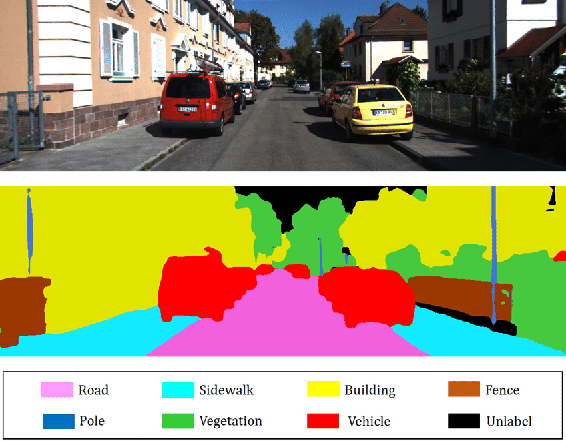

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


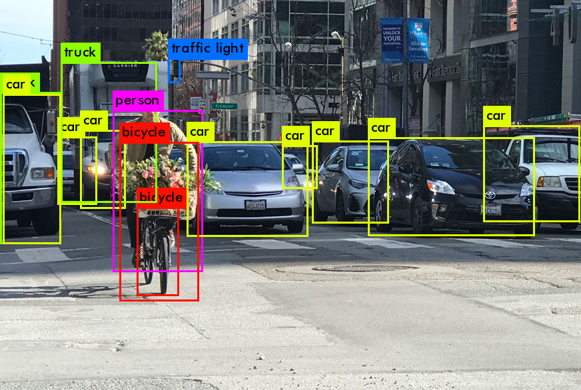

И многие-многие другие, такие как **оценка позы (pose estimation)**, **реконструкция сцены (scene reconstruction)** и т.д.

Также встречаются разного рода генеративные задачи, такие как **перенос стиля (style transfer)** или **повышение разрешения (super-resolution)**.


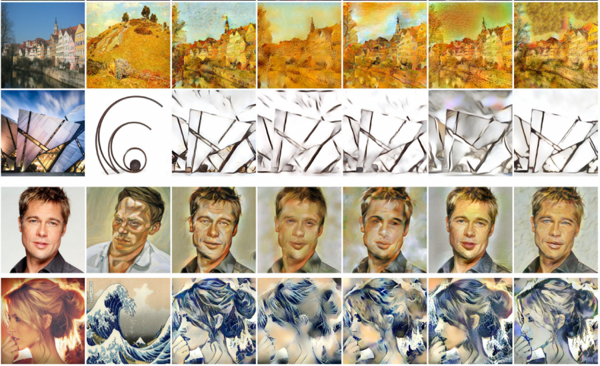

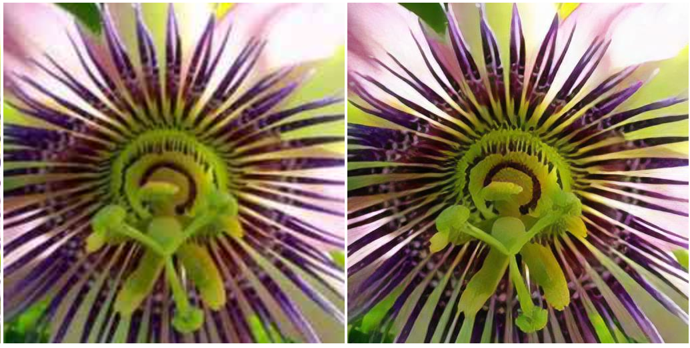

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода.

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb, Yelp)


## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [28]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

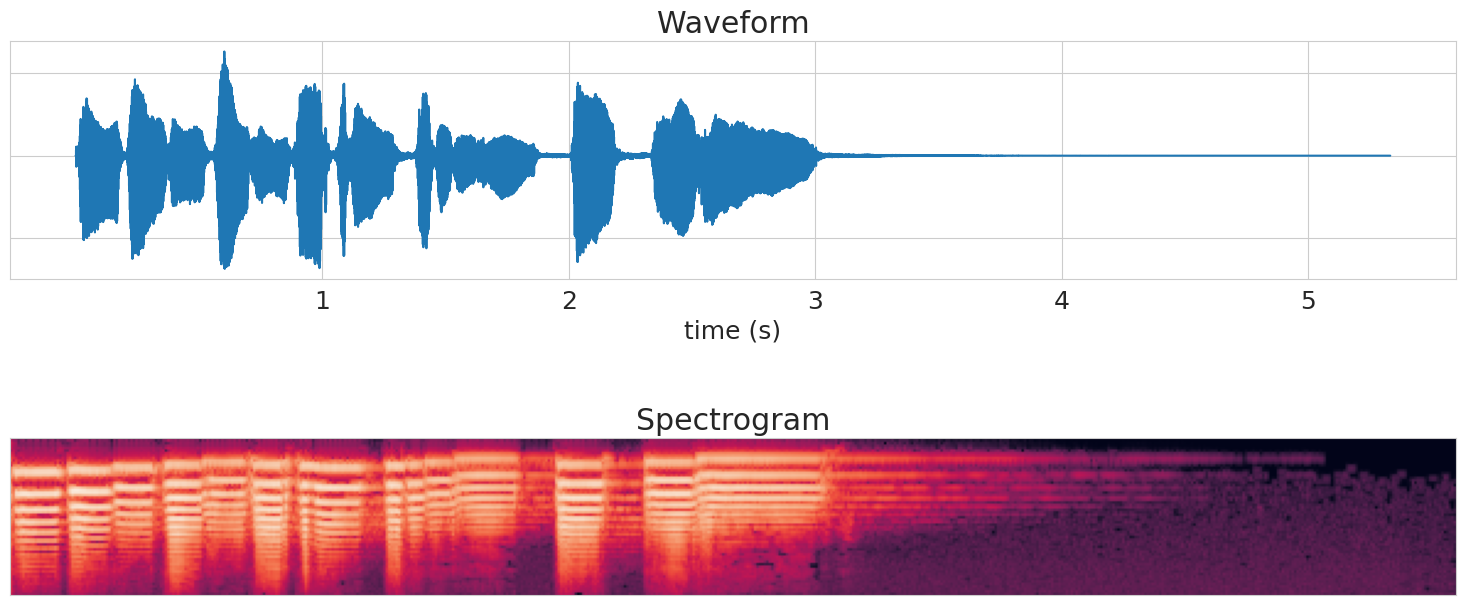

In [31]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')

axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [32]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Графовые данные

Иногда данные имеют явную или неявную графовую структуру (например, молекулы как графы атомов или профили в социальных сетях), и при обработке было бы полезно использовать это дополнительное знание. Задачи на графах можно разделить на два типа:

1. Задачи на уровне вершин (например, определение социальной роли)
2. Задачи на уровне графов (например, классификация молекул)

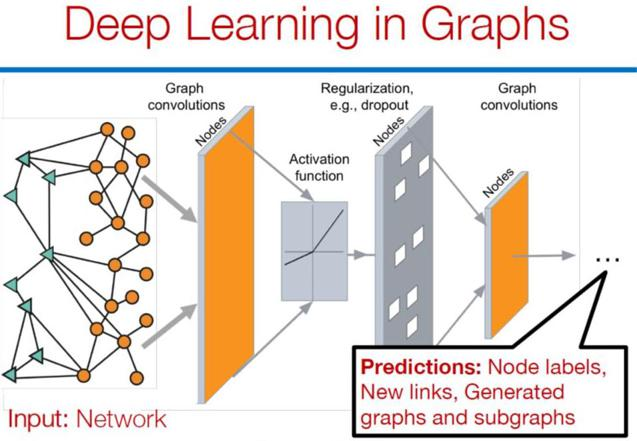

## Многодоменные задачи

Совершенствование моделей машинного обучения и рост вычислительных мощностей привели к появлению задач, затрагивающих несколько доменов данных. Вспомним задачи обработки звука: распознавание и синтез речи, по сути, представляют собой перевод из звукового домена в текстовый и обратно. Существуют примеры комбинирования текста и изображений: это Visual Question Answering (VQA) -- ответы на вопросы по изображению или text-to-image generation -- генерация изображения по текстовому запросу. Подобные задачи решаются с помощью очень больших и сложных моделей, а также требуют огромного числа данных и вычислительного бюджета. Здесь же можно вспомнить про беспилотники, которые так же обрабатывают данные очень разной природы.